In [112]:
#IMPORT REQUIRED PACKAGES

import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt 
import adjustText as aT
import osmnx as ox

In [113]:
# latest ward boundaries
try:
  wards = gpd.read_file("../data/external/lbth_wards_22.geojson")
except Exception:
  wards=gpd.read_file('https://gist.githubusercontent.com/joel-lbth/6d2c78c52163b7da1d91089c9bd849cf/raw/017486a4076483e26011e4161b1a39a828e8f5e1/lbth-wards.geojson')
  wards.to_file("../data/external/lbth_wards_22.geojson", driver='GeoJSON')

In [114]:
# 2021 oa boundaries
try:
  oa21 = gpd.read_file('../data/external/lbth_oa21.geojson')
except Exception:
  oa21 = gpd.read_file('https://gist.github.com/joel-lbth/9cd8cbf8078d78954bb011a0927001a3/raw/cc247b708b2e52c549c03af5923b9dc8d3eec5af/lbth_oa21.geojson')
  oa21.to_file('../data/external/lbth_oa21.geojson', driver='GeoJSON')

In [115]:
# low income children data 

low_income_chil=pd.read_excel('https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1145380/children-in-low-income-families-local-area-statistics-2014-to-2022.ods',
                              engine="odf",sheet_name='8_Absolute_Ward', header= 10)

In [116]:
#slice data to TH level

low_income_th= low_income_chil.loc[low_income_chil['Local Authority [note 2]']=='Tower Hamlets']

In [117]:
# tweak ward names
low_income_th = low_income_th.apply(lambda x: x.replace({'Bethnal Green':'Bethnal Green East',
 "St Peter's": 'Bethnal Green West',"St Dunstan's": "St. Dunstan's",
 "St Katharine's & Wapping": "St. Katharine's & Wapping"},regex=True ))

In [118]:
def spatialise_data(gdf, df, left_on="", right_on=""):
    """add spatial coordinates to a dataset containing LSOA/MSOA codes

    Args: gdf, df, left_on="LSOA11CD", right_on=''
    Returns: geographies plus data (geodataframe)
    """
    gdf = gdf.merge(right=df, left_on=left_on, right_on=right_on)
    return gdf


In [119]:
def spatial_plot(gdf, suptitle="", title="", column="", cmap="viridis_r", legend=True, filename=''):
    """create an geopandas spatial plot with some default settings

    Args:
        gdf (geodataframe): map of lbth
        suptitle (str, optional): super title. Defaults to ''.
        title (str, optional): title. Defaults to ''.
        column (str, optional): column to plot. Defaults to ''.
        cmap (str, optional): colormap choice. Defaults to "viridis".

    Returns:
        ax: geopandas plot axes

    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150, facecolor="w")
    plt.suptitle(suptitle, fontsize=16, y=0.95, x=0.5)
    plt.title(title, fontsize=11, x=0.5)
    gdf.plot(column=column, cmap=cmap, ax=ax, legend=legend).axis("off")
    wards.plot(ax=ax, facecolor="none", linewidth=2, edgecolor="#222")
    texts = []
    wards.apply(
        lambda x: texts.append(
            ax.text(
                s=x["name"],
                x=x.geometry.centroid.coords[0][0],
                y=x.geometry.centroid.coords[0][1],
                ha="center",
                bbox={"facecolor": "w", "alpha": 0.6, "boxstyle": "round"},
            )
        ),
        axis=1,
    )
    aT.adjust_text(
        texts,
        force_points=0.3,
        force_text=0.8,
        expand_points=(1, 1),
        expand_text=(1, 1),
    )
    plt.savefig(filename)



In [120]:
low_income_ward=spatialise_data(wards, low_income_th, left_on='name', right_on='Ward [note 2]')

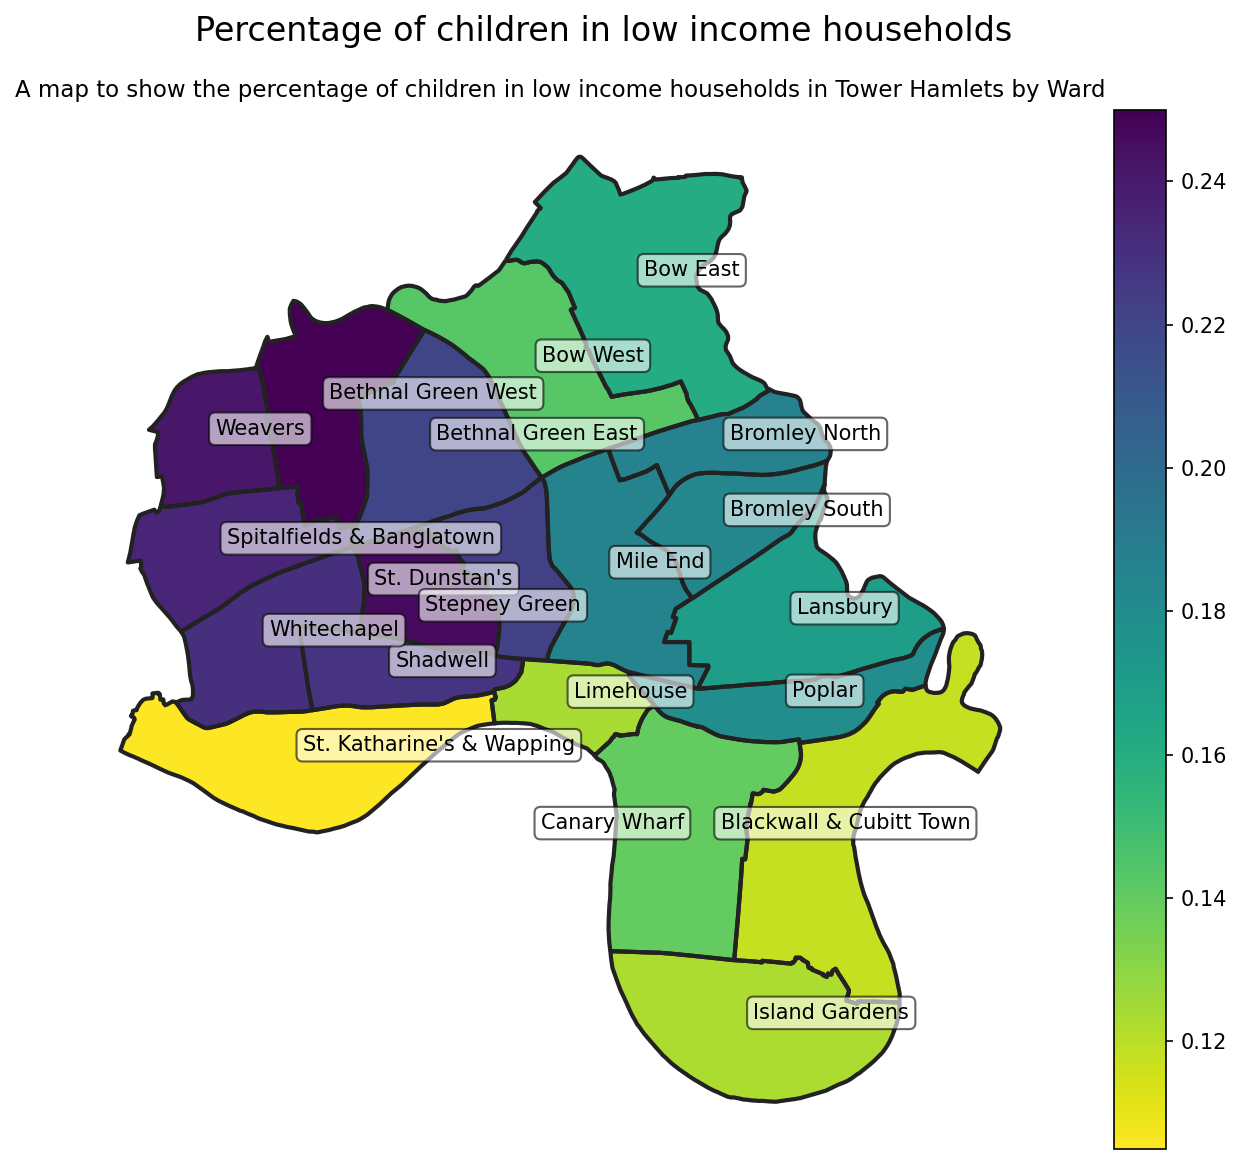

In [121]:
spatial_plot(
    spatialise_data(wards, low_income_th, left_on='name', right_on='Ward [note 2]'),
    column="Percentage of children FYE 2022(%)[p] [note 3]",
    suptitle="Percentage of children in low income households",
    title="A map to show the percentage of children in low income households in Tower Hamlets by Ward",
    cmap="viridis_r" ,filename='low_income_map.pdf'
)

Overcrowding maps
--

In [122]:
overcrowded_2_oa=pd.read_csv('https://www.nomisweb.co.uk/api/v01/dataset/NM_2070_1.data.csv?date=latest&geography=629165479...629165982,629303674...629303812,629317322...629317326,629317336...629317343,629317349...629317360,629317362...629317366,629317371,629317374,629317376,629317378,629317379,629317381,629317385,629317388...629317392,629317394...629317397,629317399...629317403,629317405...629317407,629317409,629317411,629317412,629317416...629317420,629317422...629317424,629317426,629317429...629317434,629317436,629317437,629317440...629317442,629317444...629317450,629317452...629317456,629317459...629317461,629317463,629317466...629317468,629317472,629317474...629317479,629317481,629317483,629317486,629317487,629317490,629317492,629317494,629317495,629317497,629317499...629317502,629317504,629317505,629317507...629317509,629317512...629317514,629317517,629317520,629317523,629317525,629317527,629317531,629317534,629317535,629317537,629317538,629317540,629317543...629317548,629317551,629317554,629317555,629317558,629317560,629317562,629317563,629317565,629317566,629317569...629317573,629317576...629317578,629317580,629317582,629317584,629317585,629317587,629317590...629317592,629317594,629317596...629317599,629317601,629317603,629317604,629317606,629317607,629317610,629317612,629317613,629317615...629317617,629317619...629317621,629317623,629317625...629317629,629317631...629317634,629317636,629317640,629317648,629317650...629317659,629317662,629317663,629317666...629317669,629317672...629317687,629317689,629317691,629317694,629317695,629317697,629317698,629317700,629317701,629317703,629317704,629317706,629317707,629317711...629317714,629317716,629317718...629317720,629317722...629317724,629317726,629317729,629317731,629317733,629317736...629317742,629317744,629317746...629317748,629323624,629323625&c2021_occrat_bedrooms_6=5&measures=20301')

In [123]:
overcrowded_1_oa=pd.read_csv('https://www.nomisweb.co.uk/api/v01/dataset/NM_2070_1.data.csv?date=latest&geography=629165479...629165982,629303674...629303812,629317322...629317326,629317336...629317343,629317349...629317360,629317362...629317366,629317371,629317374,629317376,629317378,629317379,629317381,629317385,629317388...629317392,629317394...629317397,629317399...629317403,629317405...629317407,629317409,629317411,629317412,629317416...629317420,629317422...629317424,629317426,629317429...629317434,629317436,629317437,629317440...629317442,629317444...629317450,629317452...629317456,629317459...629317461,629317463,629317466...629317468,629317472,629317474...629317479,629317481,629317483,629317486,629317487,629317490,629317492,629317494,629317495,629317497,629317499...629317502,629317504,629317505,629317507...629317509,629317512...629317514,629317517,629317520,629317523,629317525,629317527,629317531,629317534,629317535,629317537,629317538,629317540,629317543...629317548,629317551,629317554,629317555,629317558,629317560,629317562,629317563,629317565,629317566,629317569...629317573,629317576...629317578,629317580,629317582,629317584,629317585,629317587,629317590...629317592,629317594,629317596...629317599,629317601,629317603,629317604,629317606,629317607,629317610,629317612,629317613,629317615...629317617,629317619...629317621,629317623,629317625...629317629,629317631...629317634,629317636,629317640,629317648,629317650...629317659,629317662,629317663,629317666...629317669,629317672...629317687,629317689,629317691,629317694,629317695,629317697,629317698,629317700,629317701,629317703,629317704,629317706,629317707,629317711...629317714,629317716,629317718...629317720,629317722...629317724,629317726,629317729,629317731,629317733,629317736...629317742,629317744,629317746...629317748,629323624,629323625&c2021_occrat_bedrooms_6=4&measures=20301')

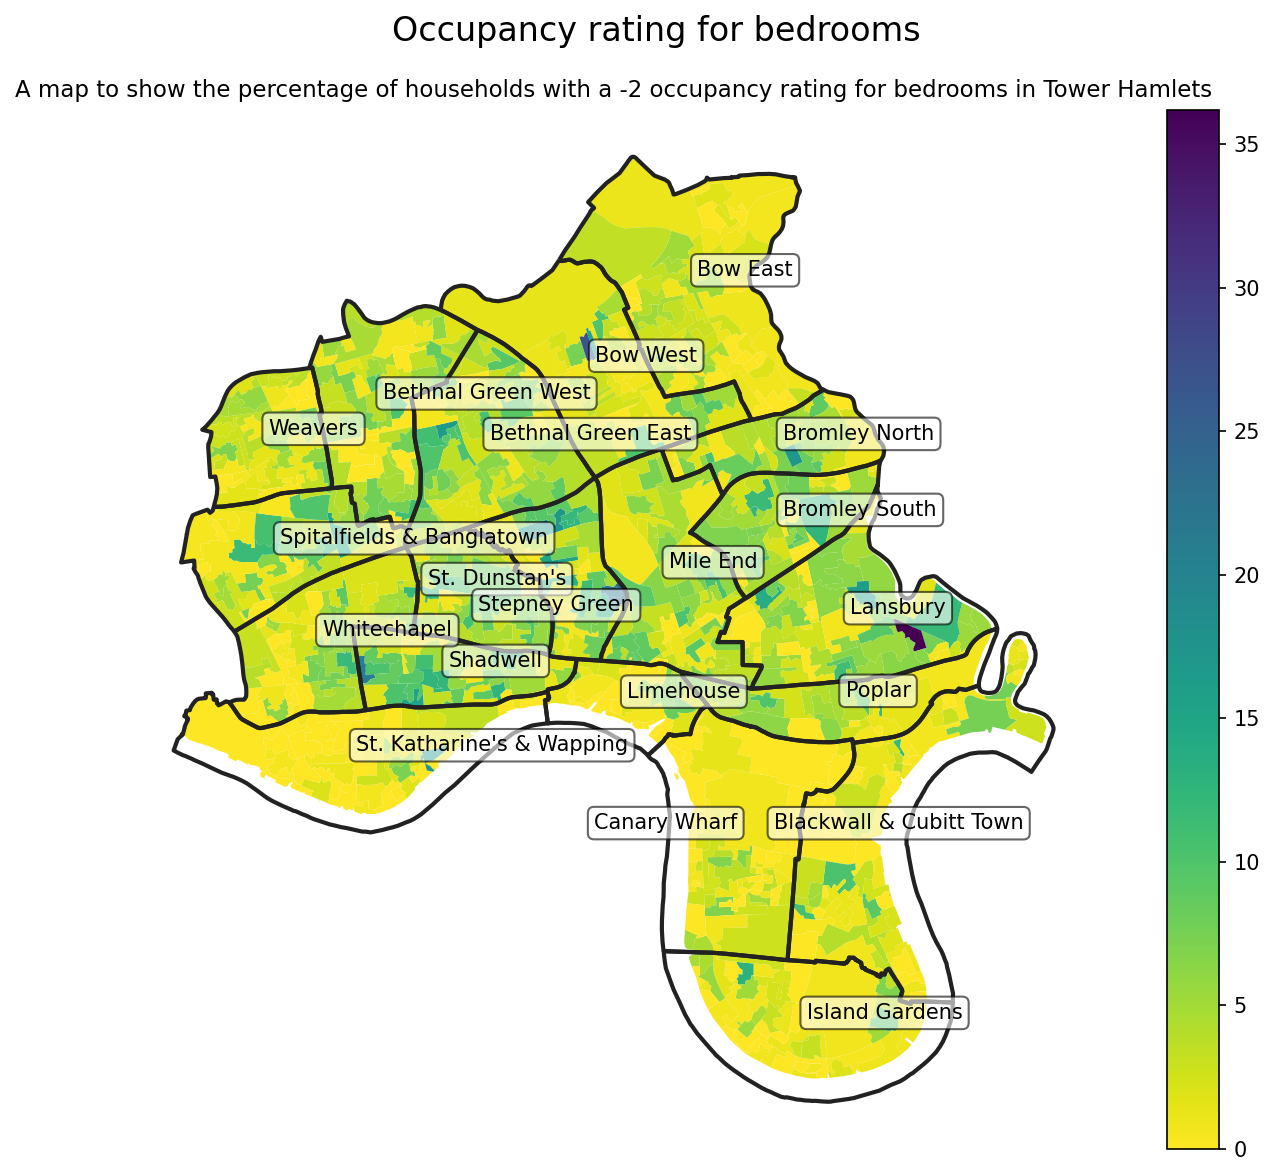

In [124]:
spatial_plot(
    spatialise_data(oa21, overcrowded_2_oa, left_on="OA21CD", right_on="GEOGRAPHY_CODE"),
    column="OBS_VALUE",
    suptitle="Occupancy rating for bedrooms",
    title="A map to show the percentage of households with a -2 occupancy rating for bedrooms in Tower Hamlets",
    cmap="viridis_r",filename='occ_-2_chl.pdf'
)

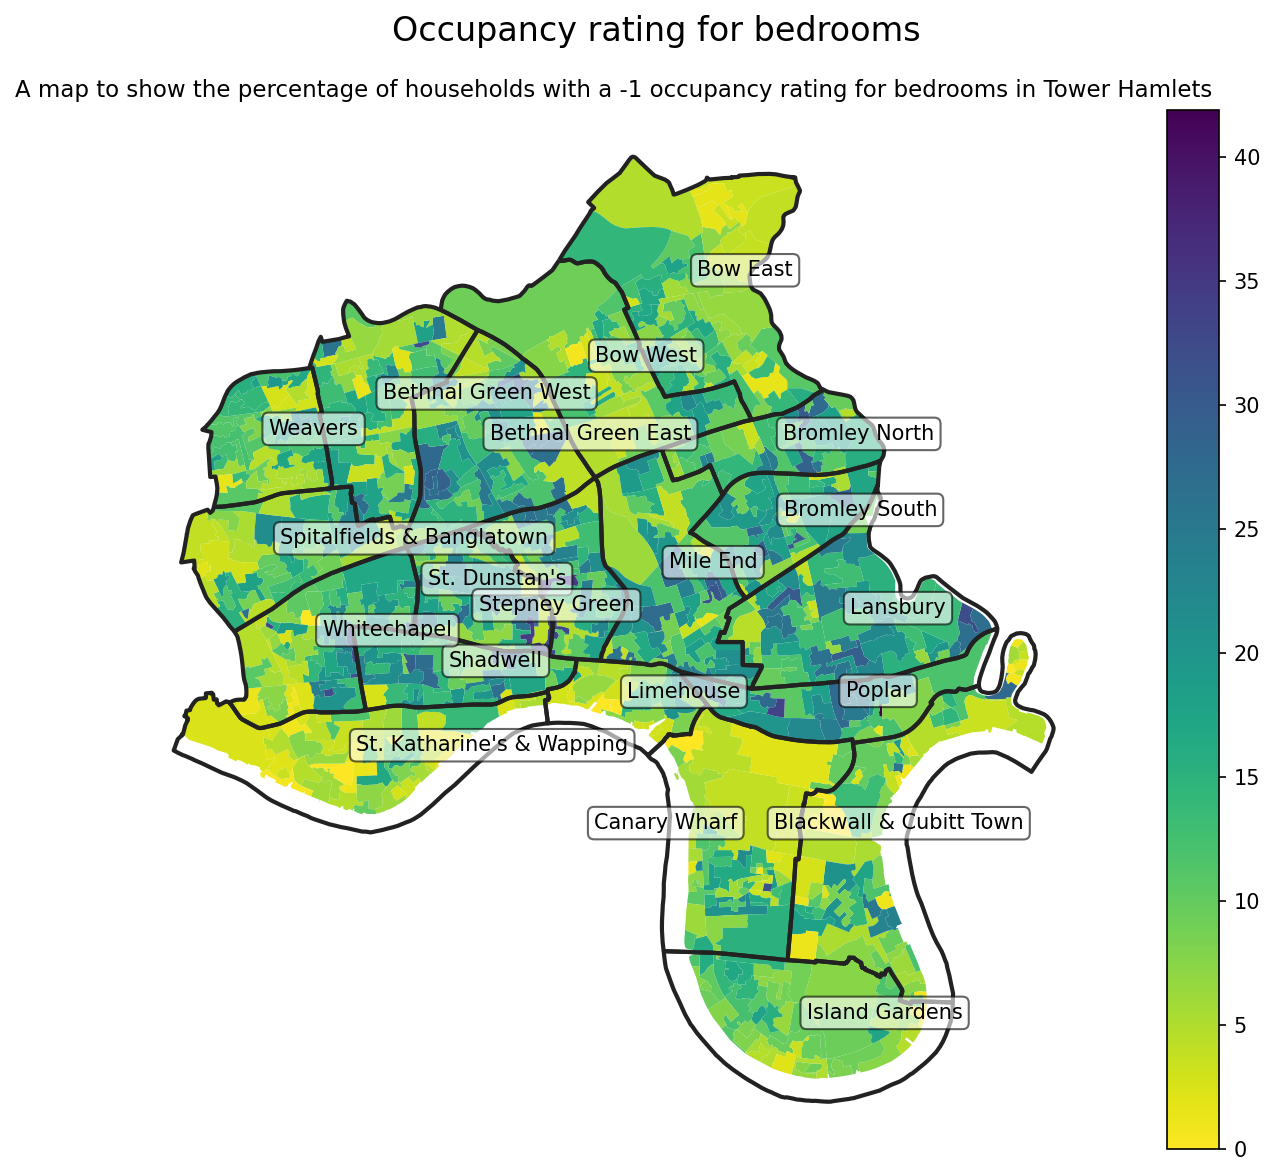

In [125]:
# plot population density by lsoa 
spatial_plot(
    spatialise_data(oa21, overcrowded_1_oa, left_on="OA21CD", right_on="GEOGRAPHY_CODE"),
    column="OBS_VALUE",
    suptitle="Occupancy rating for bedrooms",
    title="A map to show the percentage of households with a -1 occupancy rating for bedrooms in Tower Hamlets",
    cmap="viridis_r",filename='occ_-1_chl.pdf'
)

Using OSM building spatialise_data
--

In [126]:
# join osm building features to statistical areas
try:
  osm_buildings = gpd.read_file('../data/external/osm_building_footprints.geojson')
except Exception:
  # get all building footprints in some neighborhood
  place = "London Borough of Tower Hamlets, London, UK"
  tags = {"building": True}
  osm_buildings = ox.geometries_from_place(place, tags)
  # extract 'way' features only from osm building layer (discard points and relations)
  osm_buildings = osm_buildings[osm_buildings.index.map(lambda x: x[0].startswith('way'))]
  osm_buildings.geometry.to_file('../data/external/osm_building_footprints.geojson', driver='GeoJSON')
  

In [127]:
# spatial join buildings to oas
bldgs_oa = osm_buildings.sjoin(oa21, how='left')

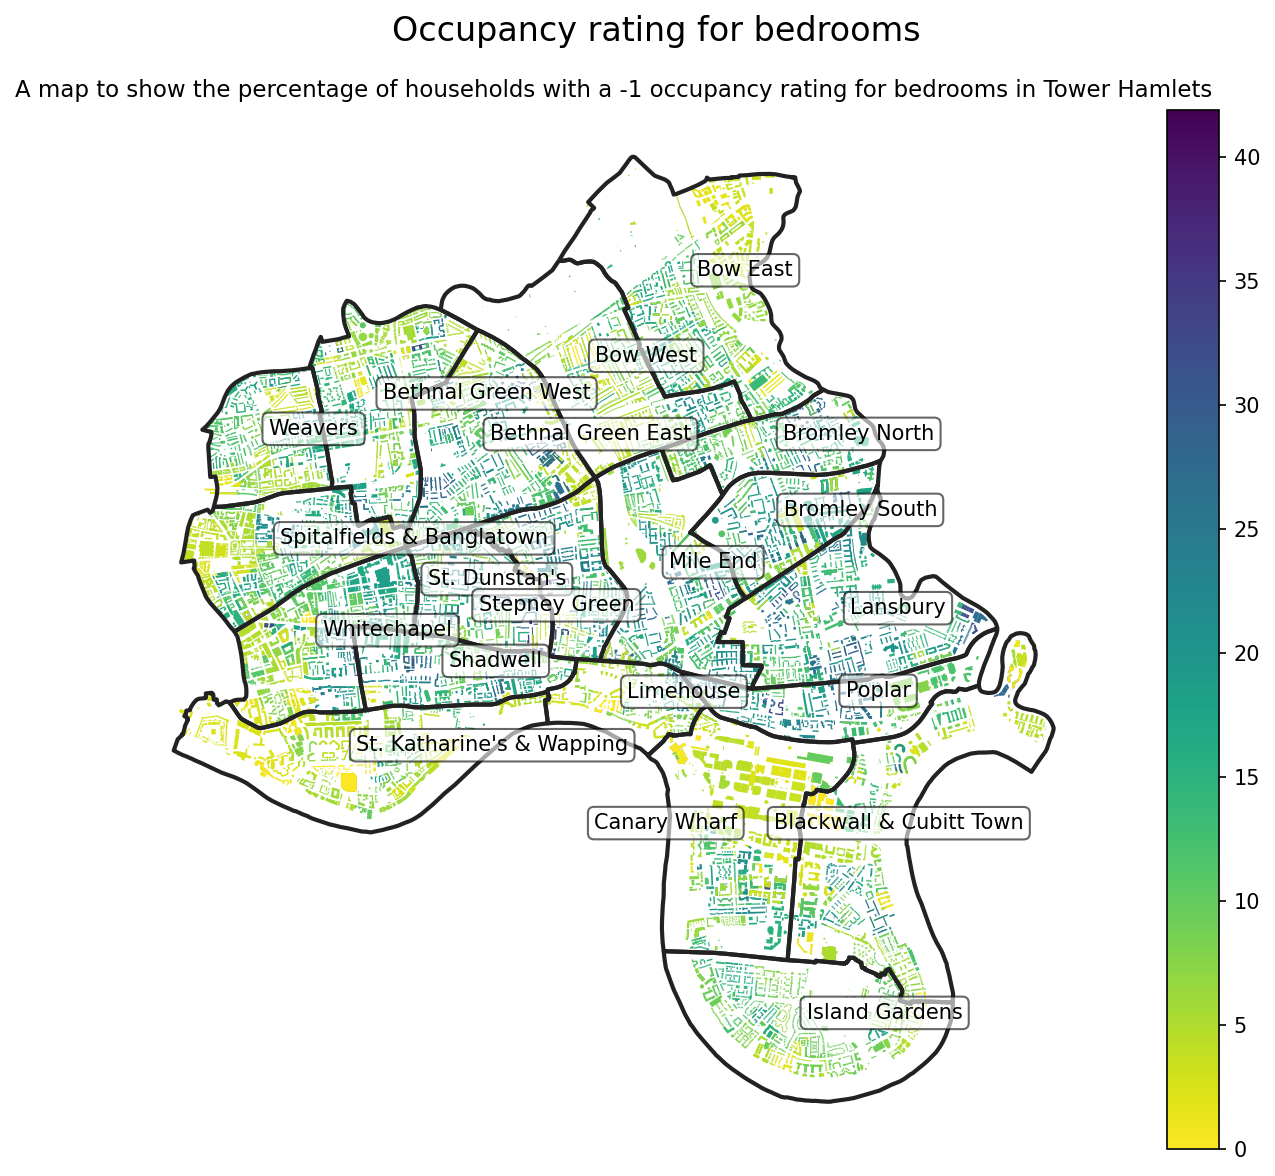

In [128]:
# plot population density by lsoa 
spatial_plot(
    spatialise_data(bldgs_oa, overcrowded_1_oa, left_on="OA21CD", right_on="GEOGRAPHY_CODE"),
    column="OBS_VALUE",
    suptitle="Occupancy rating for bedrooms",
    title="A map to show the percentage of households with a -1 occupancy rating for bedrooms in Tower Hamlets",
    cmap="viridis_r",filename='occ_-1_bui.pdf'
)

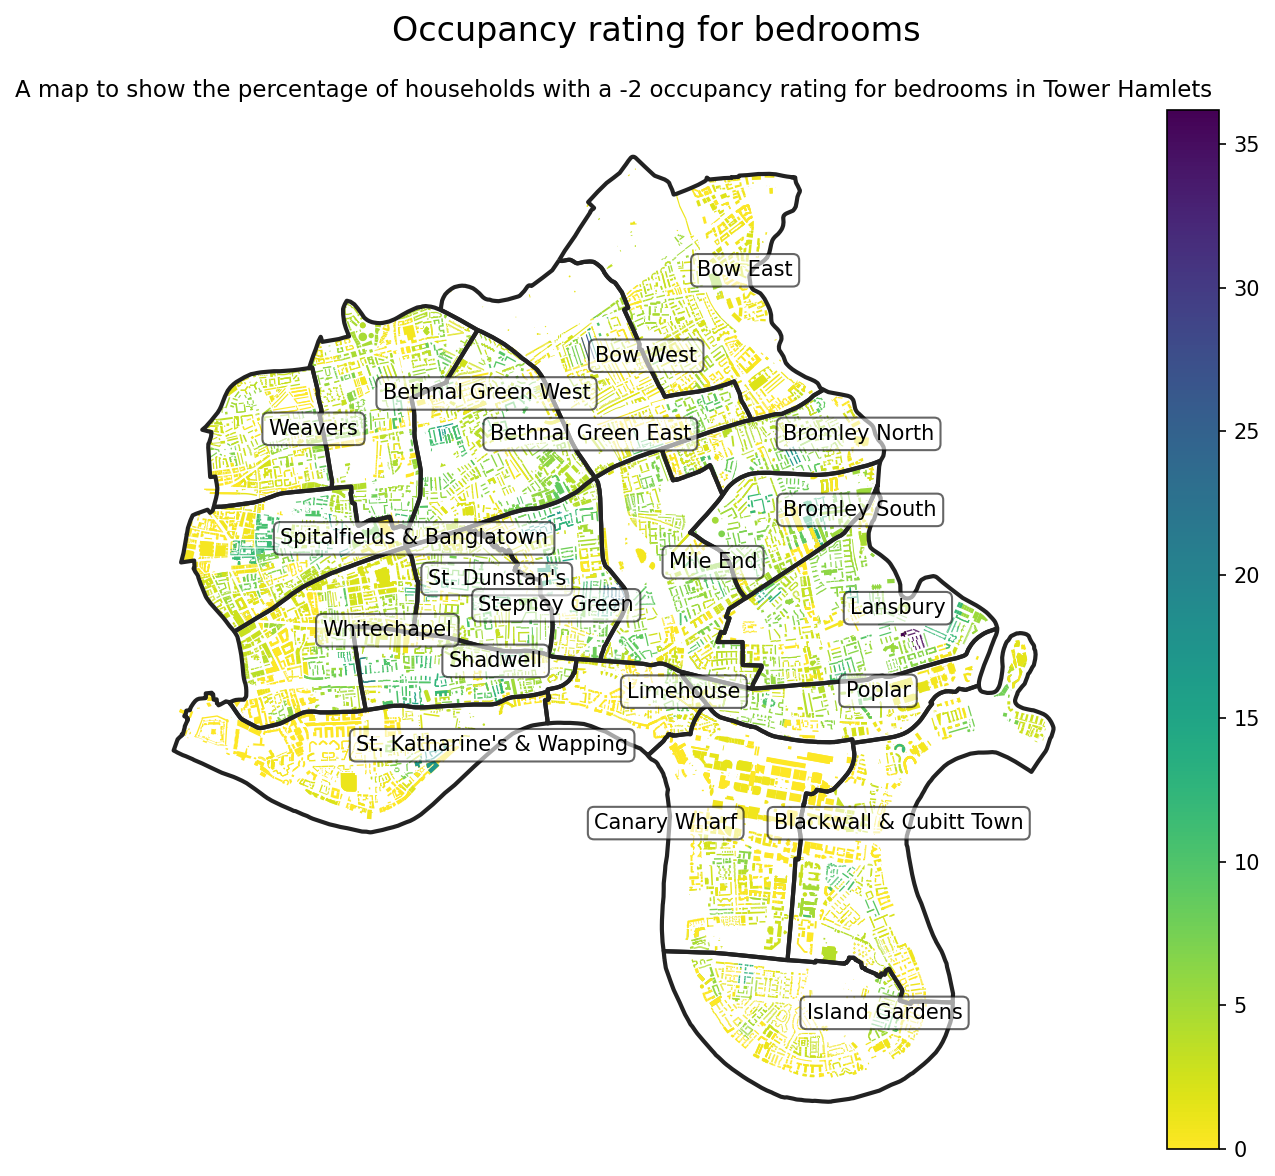

In [129]:
# plot population density by lsoa 
spatial_plot(
    spatialise_data(bldgs_oa, overcrowded_2_oa, left_on="OA21CD", right_on="GEOGRAPHY_CODE"),
    column="OBS_VALUE",
    suptitle="Occupancy rating for bedrooms",
    title="A map to show the percentage of households with a -2 occupancy rating for bedrooms in Tower Hamlets",
    cmap="viridis_r",filename='occ_-2_bui.pdf'
)